In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

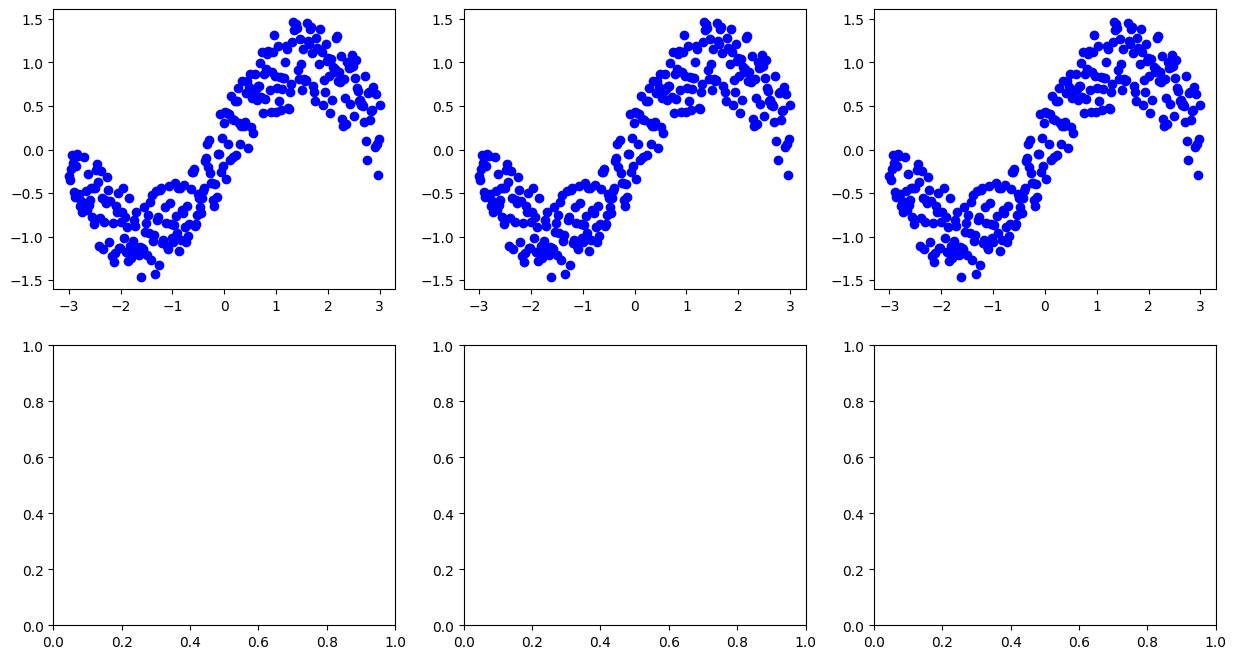

In [12]:
# 1.读取数据
# -1用于自动推断，此处是300*1
X = np.linspace(-3, 3, 300).reshape(-1, 1)

# 基于sin,叠加随机噪声
y = np.sin(X) + np.random.uniform(-0.5, 0.5, 300).reshape(-1, 1)

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ax[0,0].scatter(X, y,  c='blue')
ax[0,1].scatter(X, y,  c='blue')
ax[0,2].scatter(X, y,  c='blue')

In [13]:
# 从一个向量x生成(x, x^2, ... x^n)
def polynomial(X, degree):
    return np.hstack([X**i for i in range(1, degree + 1)])

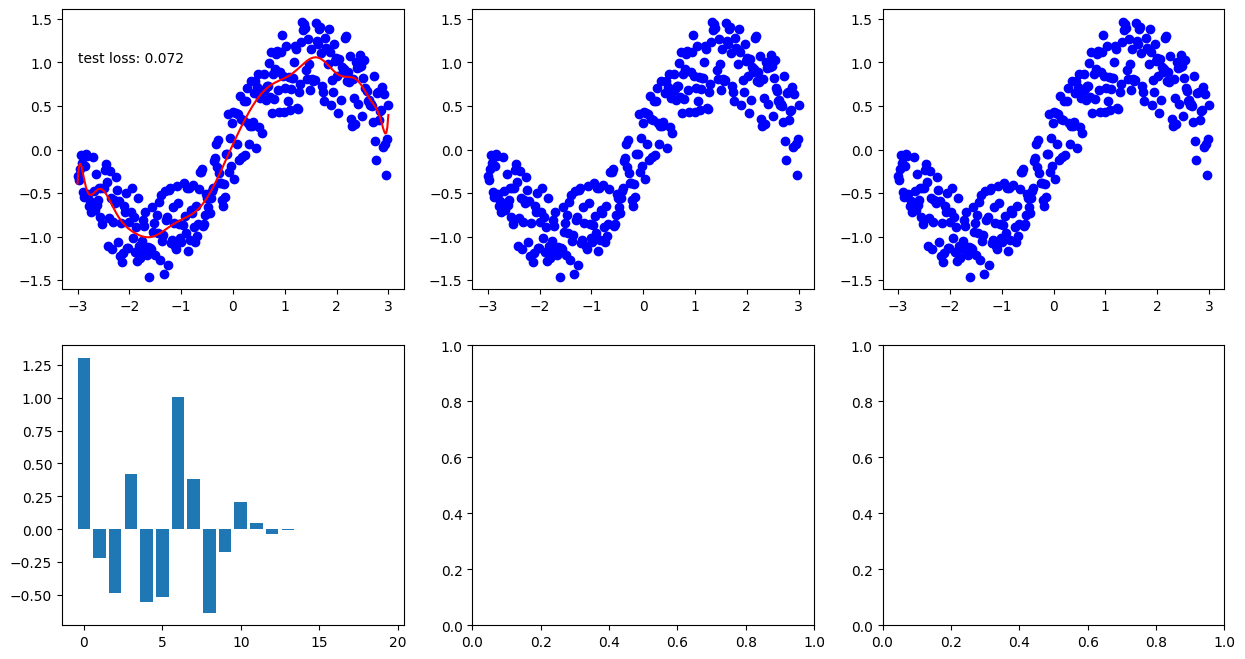

In [14]:
# 过拟合

# 2.划分训练集和测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

trainX_poly = polynomial(trainX, 20)
testX_poly = polynomial(testX, 20)

# 3.定义损失函数和模型
model = LinearRegression()

# 4.训练模型
model.fit(trainX_poly, trainy)

# 5.预测结果
y_pred = model.predict(testX_poly)
test_loss = mean_squared_error(testy, y_pred)
train_loss = mean_squared_error(trainy, model.predict(trainX_poly))

ax[0,0].plot(X, model.predict(polynomial(X, 20)), c='red')
ax[0,0].text(-3, 1, f"test loss: {test_loss:.3f}")

# 画出所有系数的柱状图
ax[1,0].bar(np.arange(20), model.coef_.reshape(-1))

fig

/home/kejun/software/miniconda3/envs/AI_learning/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+01, tolerance: 1.447e-02
  model = cd_fast.enet_coordinate_descent(


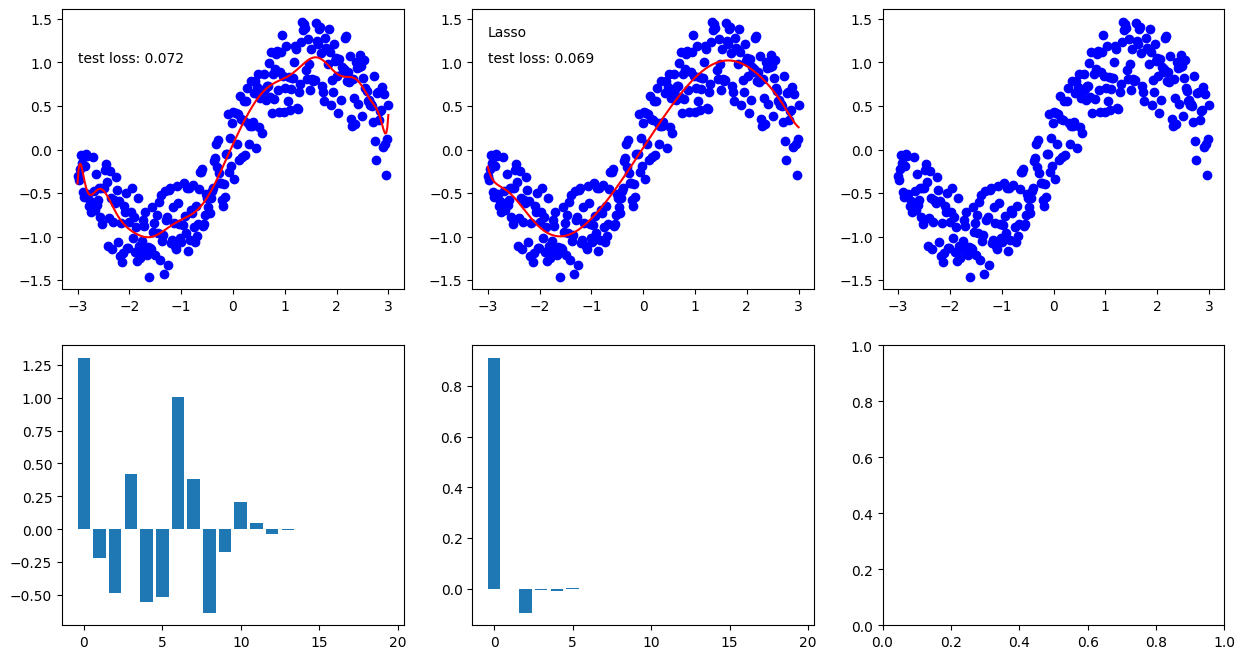

In [15]:
# 3.定义损失函数和模型
# Lasso regression -- L1 regularization
lasso = Lasso(alpha=0.01)

# 4.训练模型
lasso.fit(trainX_poly, trainy)

# 5.预测结果
y_pred2 = lasso.predict(testX_poly)
test_loss2 = mean_squared_error(testy, y_pred2)

ax[0,1].plot(X, lasso.predict(polynomial(X, 20)), c='red')
ax[0,1].text(-3, 1, f"test loss: {test_loss2:.3f}")
ax[0,1].text(-3, 1.3, "Lasso")

# 画出所有系数的柱状图
ax[1,1].bar(np.arange(20), lasso.coef_.reshape(-1))

fig

/home/kejun/software/miniconda3/envs/AI_learning/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.69693e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


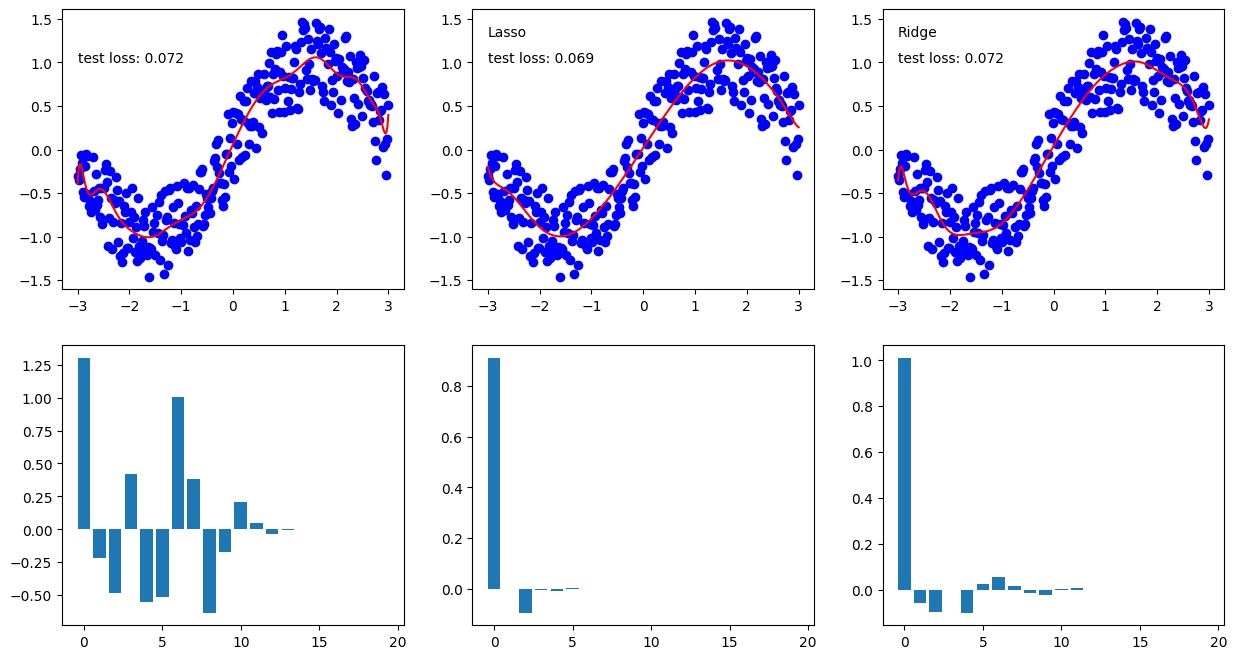

In [16]:
# 3.定义损失函数和模型
# Ridge regression -- L2 regularization
ridge = Ridge(alpha=1)

# 4.训练模型
ridge.fit(trainX_poly, trainy)

# 5.预测结果
y_pred3 = ridge.predict(testX_poly)
test_loss3 = mean_squared_error(testy, y_pred3)

ax[0,2].plot(X, ridge.predict(polynomial(X, 20)), c='red')
ax[0,2].text(-3, 1, f"test loss: {test_loss3:.3f}")
ax[0,2].text(-3, 1.3, "Ridge")

# 画出所有系数的柱状图
ax[1,2].bar(np.arange(20), ridge.coef_.reshape(-1))

fig
